# Dynamic Programming
Basically we solve the Bellman optimality equation using these methods:
* Value Iteration
* Policy Iteration
From the perspective of the quality of the policy found both methods will work, but they are the base of more advanced methodologies.

### References
* [Artificial Intelligence](https://github.com/aimacode/aima-python)
* [MDP code sample](http://aima.cs.berkeley.edu/python/mdp.html)

In [1]:
from grid_world.grid_samples import *
from grid_world.grid_actions import GridActions
from grid_world.gridworld_mdp import *

import matplotlib.pyplot as plt
import collections
#from collections import defaultdict

## Grid World
![title](imgs/GridWorldBook.png)

In [2]:
grid_string = get_book_grid()
print(grid_string)

[[' ', ' ', ' ', 1], [' ', '#', ' ', -1], ['S', ' ', ' ', ' ']]


In [3]:
grid_world = GridWorld(grid_string)
#grid_world.gamma = 0.1
grid_world.gamma = 0.9
print('Grid shape:', grid_world.shape)
print('All actions:', grid_world.all_actions)
print('Number of states:', grid_world.num_states)
print('States:', grid_world.states)
print('Start state:', grid_world.start_state)
print('Rewards on each state')
for st in grid_world.states:
    print('\tState:' , st,'Reward:', grid_world.R(st))

Grid shape: (3, 4)
All actions: ['up', 'down', 'left', 'right']
Number of states: 11
States: {(0, 1), (1, 2), (0, 0), (1, 3), (2, 1), (2, 0), (2, 3), (2, 2), (1, 0), (0, 2), (0, 3)}
Start state: (2, 0)
Rewards on each state
	State: (0, 1) Reward: 0
	State: (1, 2) Reward: 0
	State: (0, 0) Reward: 0
	State: (1, 3) Reward: -1
	State: (2, 1) Reward: 0
	State: (2, 0) Reward: 0
	State: (2, 3) Reward: 0
	State: (2, 2) Reward: 0
	State: (1, 0) Reward: 0
	State: (0, 2) Reward: 0
	State: (0, 3) Reward: 1


### Solve with Value iteration

In [4]:
value_mdp = value_iteration(grid_world)
policy_val = best_policy(grid_world, value_mdp)
print('Value Function')
for key, value in value_mdp.items():    
    print ('coordinate:',key, '==>',value)
print('Policy(From Value iteration):')
for st in grid_world.states:
    print('\tState:', st, 'action:', GridActions.action_to_str(policy_val[st]))

Value Function
coordinate: (0, 1) ==> 0.7443801180533612
coordinate: (1, 2) ==> 0.5718590147306759
coordinate: (0, 0) ==> 0.644967826744644
coordinate: (1, 3) ==> -1.0
coordinate: (2, 1) ==> 0.43075218166042545
coordinate: (2, 0) ==> 0.49065027469590516
coordinate: (2, 3) ==> 0.27724220363051516
coordinate: (2, 2) ==> 0.4754426095304643
coordinate: (1, 0) ==> 0.5663098424341917
coordinate: (0, 2) ==> 0.8477662714927858
coordinate: (0, 3) ==> 1.0
Policy(From Value iteration):
	State: (0, 1) action: right
	State: (1, 2) action: up
	State: (0, 0) action: right
	State: (1, 3) action: None
	State: (2, 1) action: left
	State: (2, 0) action: up
	State: (2, 3) action: left
	State: (2, 2) action: up
	State: (1, 0) action: up
	State: (0, 2) action: right
	State: (0, 3) action: None


### Solve with policy Iteration

In [5]:
policy_iter = policy_iteration(grid_world)
print('Policy(From Policy iteration):')
for st in grid_world.states:
    print('\tState:', st, 'action:', GridActions.action_to_str(policy_iter[st]))

Policy(From Policy iteration):
	State: (0, 1) action: up
	State: (1, 2) action: left
	State: (0, 0) action: up
	State: (1, 3) action: None
	State: (2, 1) action: up
	State: (2, 0) action: up
	State: (2, 3) action: down
	State: (2, 2) action: up
	State: (1, 0) action: up
	State: (0, 2) action: right
	State: (0, 3) action: None


## Iteractive Demo

In [6]:
def make_plot_grid_step_function(columns, rows, U_over_time):
    """ipywidgets interactive function supports single parameter as input.
    This function creates and return such a function by taking as input
    other parameters."""

    def plot_grid_step(iteration):
        # Get data
        data = U_over_time[iteration]
        # Fast dictionary
        data = collections.defaultdict(lambda: 0, data)
        grid = []
        for row in range(rows):
            current_row = []
            for column in range(columns):
                #current_row.append(data[(column, row)])
                current_row.append(data[(row, column)])
            grid.append(current_row)
        grid.reverse() # output like book
        fig = plt.imshow(grid, cmap=plt.cm.bwr, interpolation='nearest')

        plt.axis('off')
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)

        for col in range(len(grid)):
            for row in range(len(grid[0])):
                magic = grid[col][row]
                fig.axes.text(row, col, "{0:.2f}".format(magic), va='center', ha='center')

        plt.show()

    return plot_grid_step

In [7]:
def value_iteration_iter(mdp, iterations=30):
    U_over_time = []
    U1 = {s: 0 for s in mdp.states}
    R, T, gamma = mdp.R, mdp.T, mdp.gamma
    for _ in range(iterations):
        U = U1.copy()
        for s in mdp.states:            
            U1[s] = R(s) + gamma * max([sum([p * U[s1] for (p, s1) in T(s, a)])for a in mdp.possible_actions(s)])
        U_over_time.append(U)
    return U_over_time

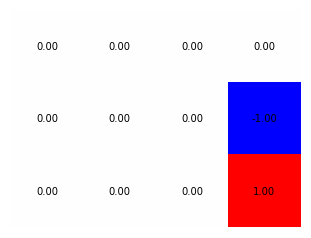

In [8]:
import ipywidgets as widgets
from IPython.display import display

# Grid dimensions
columns = 4
rows = 3
U_over_time = value_iteration_iter(grid_world)

# Add Slider
iteration_slider = widgets.IntSlider(min=1, max=29, step=1, value=0)
w=widgets.interactive(make_plot_grid_step_function(columns, rows, U_over_time),iteration=iteration_slider)
#w=widgets.interactive(make_plot_grid_step_function(rows, columns, U_over_time),iteration=iteration_slider)
display(w)